In [1]:
import sys
import os

# Assuming notebooks and src are subdirectories of the project directory
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(os.path.join(parent_dir, 'src'))

In [2]:
import torch

import utils
import viz
import cluster

/u/jdr/venvs/venv_lexcons/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


### Initial look at what this gap looks like

In [5]:
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)

disc_base = torch.load('../outputs/logodds/gemma-2-2b--disc-few.pt', weights_only=True)
gen_base = torch.load('../outputs/logodds/gemma-2-2b--gen-zero.pt', weights_only=True)

Pearson:  0.780615670302538
Pearson for pos:  0.5381100052854741
Pearson for neg:  0.4742380154859837


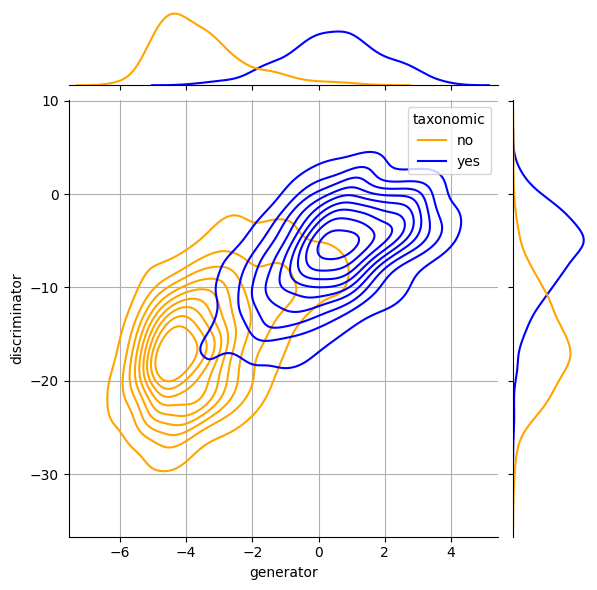

In [6]:
viz.plot_correlations(L_test, disc_base, gen_base)

### Do models exposed to generator/discriminator views of the *same* data have a smaller gap?

In [7]:
disc = torch.load('../outputs/logodds/ftmodel--gemma-2-2b--discriminator--few--all--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/ftmodel--gemma-2-2b--discriminator--few--all--disc-few.pt', weights_only=True) 